In [19]:
import pandas as pd
import numpy as np

In [20]:
data=pd.read_csv('body_health.csv')

In [21]:
data.head()

,Body_Temperature,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Health_Status
0,99.2,114.0,125.0,99.0,283.0,Critical
1,98.4,103.0,101.0,82.0,176.0,Risk
2,99.4,108.0,91.0,68.0,159.0,Risk
3,100.4,99.0,102.0,93.0,222.0,Risk
4,98.3,70.0,142.0,105.0,NaN,Critical


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Body_Temperature          950 non-null    float64
 1   Heart_Rate                950 non-null    float64
 2   Blood_Pressure_Systolic   950 non-null    float64
 3   Blood_Pressure_Diastolic  950 non-null    float64
 4   Cholesterol_Level         950 non-null    float64
 5   Health_Status             1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Body_Temperature,950.0,98.638421,1.171828,94.7,97.90,98.6,99.4,103.2
Heart_Rate,950.0,88.734737,17.390972,60.0,73.00,89.0,104.0,119.0
Blood_Pressure_Systolic,950.0,133.249474,25.448638,90.0,111.00,133.0,154.0,179.0
Blood_Pressure_Diastolic,950.0,89.804211,17.295107,60.0,75.25,89.0,105.0,119.0
Cholesterol_Level,950.0,227.167368,43.338796,150.0,189.00,228.0,265.0,299.0


from the above we can get the health statics of our dataset

In [24]:
data.isnull().sum()

,0
Body_Temperature,50
Heart_Rate,50
Blood_Pressure_Systolic,50
Blood_Pressure_Diastolic,50
Cholesterol_Level,50
Health_Status,0


In [27]:
# we will impute the missing values
data['Body_Temperature'].fillna(data['Body_Temperature'].mean(),inplace=True)
data['Blood_Pressure_Diastolic'].fillna(data['Blood_Pressure_Diastolic'].mean(),inplace=True)
data['Blood_Pressure_Systolic'].fillna(data['Blood_Pressure_Systolic'].mean(),inplace=True)
data['Heart_Rate'].fillna(data['Heart_Rate'].mean(),inplace=True)
data['Cholesterol_Level'].fillna(data['Cholesterol_Level'].mean(),inplace=True)

<ipython-input-27-9ac66f87ab1d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Body_Temperature'].fillna(data['Body_Temperature'].mean(),inplace=True)
<ipython-input-27-9ac66f87ab1d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [28]:
data.isnull().sum()

,0
Body_Temperature,0
Heart_Rate,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Cholesterol_Level,0
Health_Status,0


In [30]:
data.duplicated().sum()

0

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

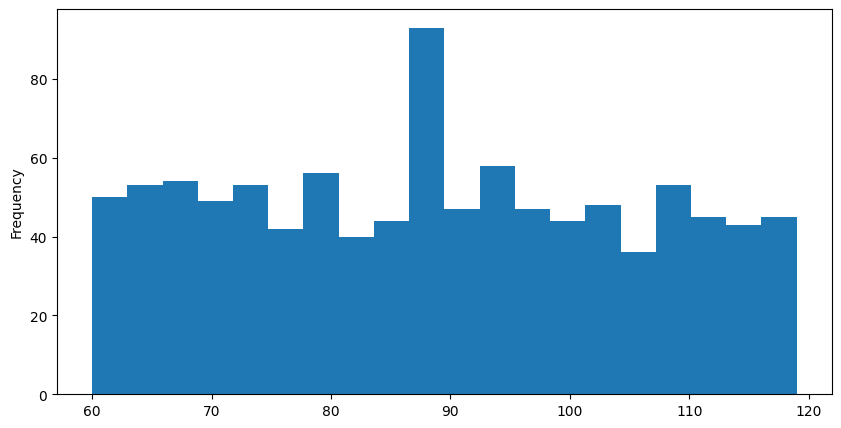

In [53]:
data['Heart_Rate'].plot(kind='hist',figsize=(10,5),bins=20)

<Axes: ylabel='Frequency'>

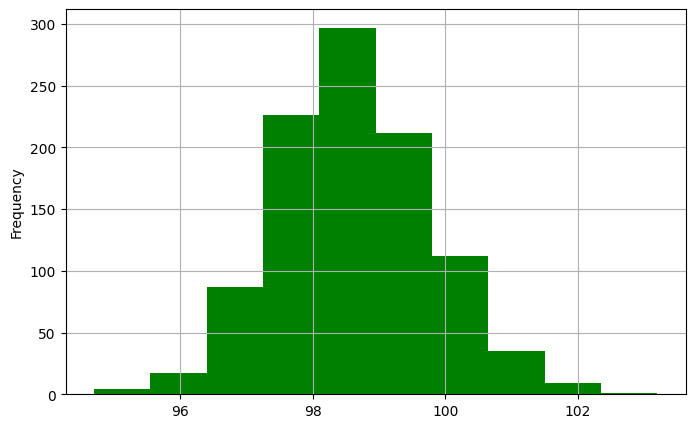

In [36]:
data['Body_Temperature'].plot(kind='hist',color='green',figsize=(8,5),bins=10,grid=True)

<Axes: ylabel='Frequency'>

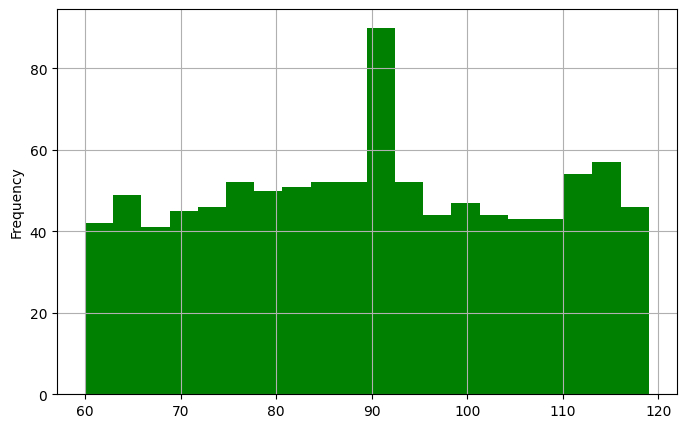

In [39]:
data['Blood_Pressure_Diastolic'].plot(kind='hist',color='green',figsize=(8,5),bins=20,grid=True)

<Axes: xlabel='Body_Temperature', ylabel='Heart_Rate'>

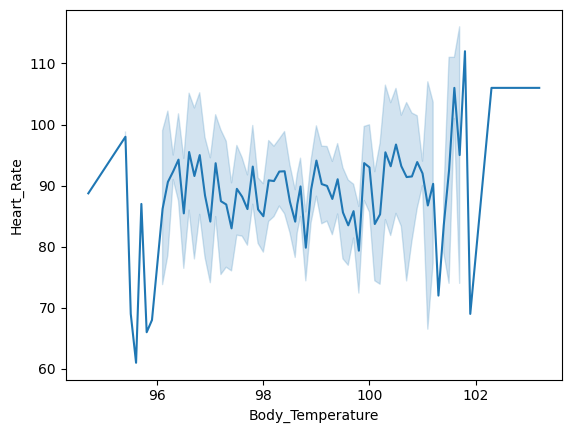

In [40]:
#we will plot with comparison of target feature
sns.lineplot(x='Body_Temperature',y='Heart_Rate',data=data)

<Axes: xlabel='count', ylabel='Health_Status'>

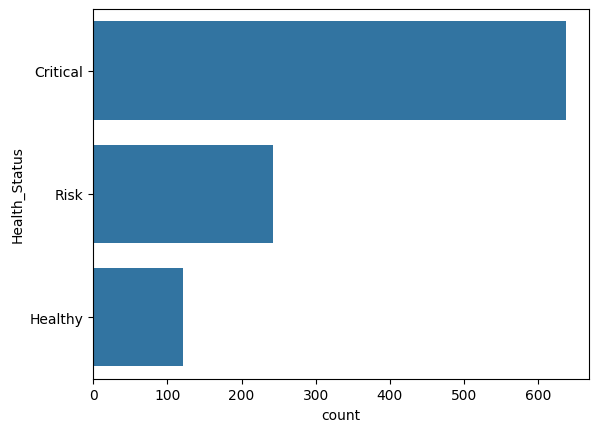

In [46]:
sns.countplot(data.Health_Status)

<Axes: xlabel='Body_Temperature', ylabel='Proportion'>

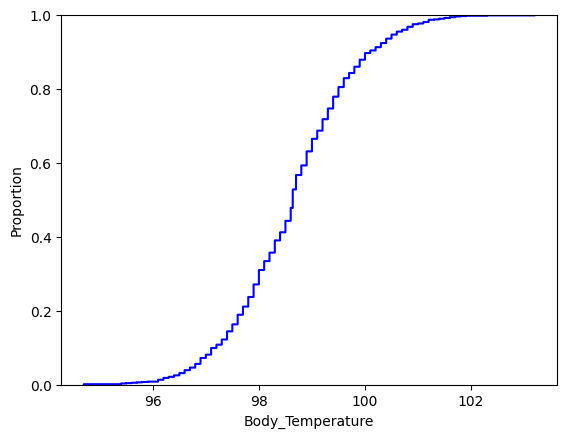

In [52]:
sns.ecdfplot(data.Body_Temperature,color='blue')

In [54]:
data['Health_Status']=data['Health_Status'].map({'Critical':2,'Risk':1,'Healthy':0})

In [55]:
data.head()

,Body_Temperature,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Health_Status
0,99.2,114.0,125.0,99.0,283.000000,2
1,98.4,103.0,101.0,82.0,176.000000,1
2,99.4,108.0,91.0,68.0,159.000000,1
3,100.4,99.0,102.0,93.0,222.000000,1
4,98.3,70.0,142.0,105.0,227.167368,2


In [56]:
x=data.drop('Health_Status',axis=1)
y=data['Health_Status']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [61]:
y_pred=model.predict(x_test)

In [63]:
y_pred

array([2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [64]:
accuracy_score(y_test,y_pred)

0.725

this means our model can predict the values with 72.5% Accuracy

In [65]:
confusion_matrix(y_test,y_pred)

array([[ 15,  14,   0],
       [  0,  11,  33],
       [  1,   7, 119]])

In [66]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.52      0.67        29\n           1       0.34      0.25      0.29        44\n           2       0.78      0.94      0.85       127\n\n    accuracy                           0.72       200\n   macro avg       0.69      0.57      0.60       200\nweighted avg       0.71      0.72      0.70       200\n'

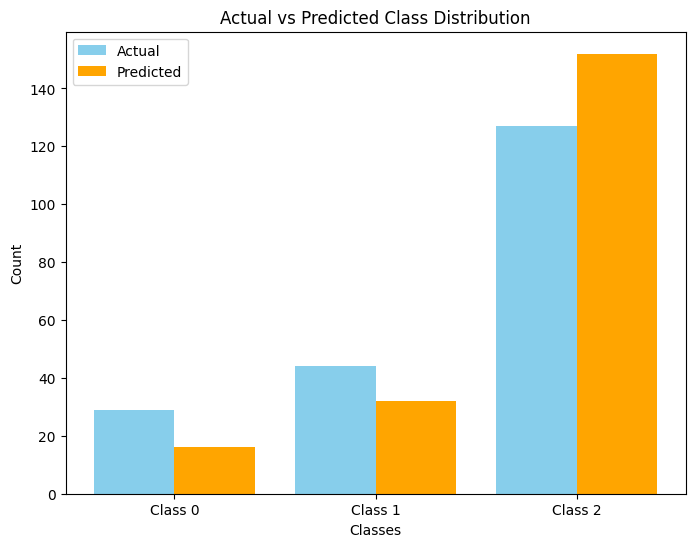

In [67]:
# Count actual and predicted values for each class
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred)

# Bar plot
classes = ['Class 0', 'Class 1', 'Class 2']
x = np.arange(len(classes))

plt.figure(figsize=(8, 6))
plt.bar(x - 0.2, actual_counts, width=0.4, label='Actual', color='skyblue')
plt.bar(x + 0.2, predicted_counts, width=0.4, label='Predicted', color='orange')
plt.xticks(x, classes)
plt.title("Actual vs Predicted Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend()
plt.show()


In [68]:
# will predict new person data
new=[99.2,	114.0,	125.0,	99.0,	283.000000]
model.predict([new])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([2])

In [69]:
new1=[87.24, 113.7, 134, 84.0, 290]
model.predict([new1])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([2])

our model predicted the person health is in Critical situation based on the features given.